In [4]:
#Description: This program uses Fibonacci Retracement Levels and MACD to indicate when to buy and sell stock

In [5]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#Get and show the data
df = pd.read_csv("/Users/mymac/Documents/PythonLab/MoneyMagnet/Symbols/Stocks/AAPL.csv")
#Set the data as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2022-01-03,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724548,104487900
2022-01-04,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400
2022-01-05,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723602,94537600
2022-01-06,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840256,96904000
2022-01-07,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008133,86709100
...,...,...,...,...,...,...,...
2024-06-11,2024-06-11,193.649994,207.160004,193.630005,207.149994,207.149994,172373300
2024-06-12,2024-06-12,207.369995,220.199997,206.899994,213.070007,213.070007,198134300
2024-06-13,2024-06-13,214.740005,216.750000,211.600006,214.240005,214.240005,97862700
2024-06-14,2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,69175600


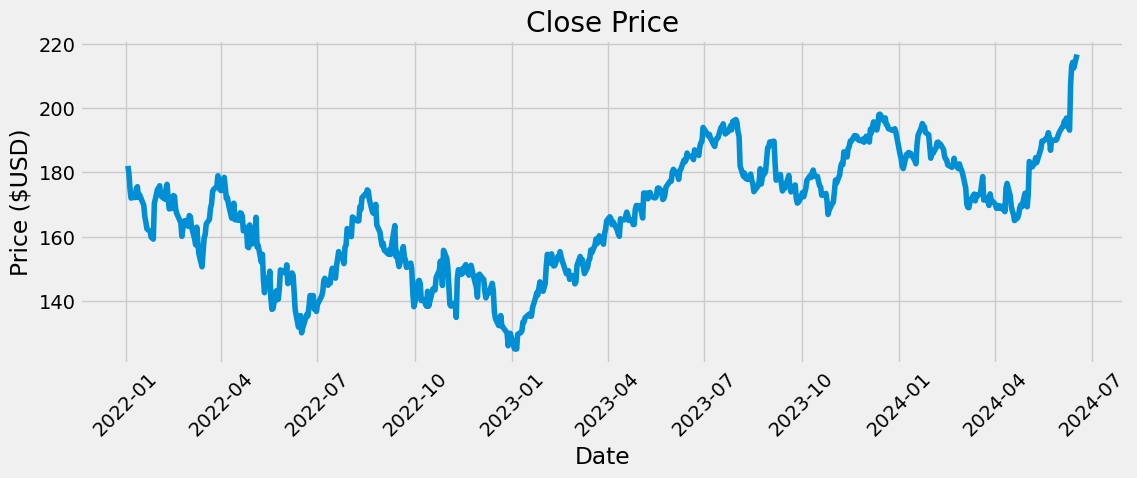

In [8]:
#Plot the data
plt.figure(figsize=(12,4))
plt.plot(df.Close)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.xticks(rotation=45)
plt.show()

In [9]:
#Calculate the Fibonacci Retracement Levels
max_price = df['Close'].max()
min_price = df['Close'].min()

difference = max_price - min_price
first_level = max_price - difference * 0.236
second_level = max_price - difference * 0.382
third_level = max_price - difference * 0.5
fourth_level = max_price - difference * 0.618

In [10]:
#Calculate the MACD Line and the Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#Calculate the Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=26, adjust= False).mean()
#Calculate the Moving Average Convergence/Divergence(MACD)
MACD = ShortEMA - LongEMA
#Calculate the Signal Line
signal = MACD.ewm(span=9, adjust =False).mean()

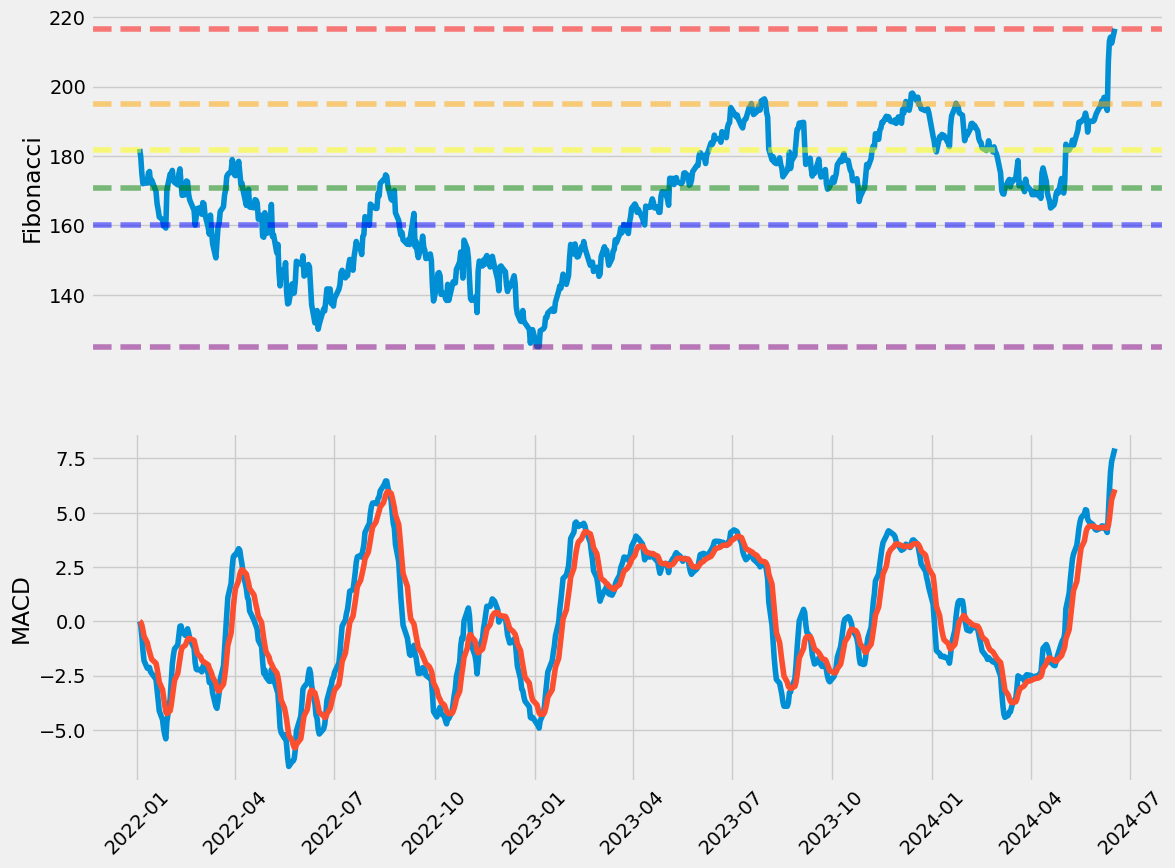

In [12]:
#Plot the Fibonacci Levels along with the close price and the MACD and Signal Line
new_df = df

#plot the Fibonacci Levels
plt.figure(figsize=(12.33, 9.5))
plt.subplot(2,1,1)
plt.plot(new_df.index, new_df['Close'])
plt.axhline(max_price, linestyle= '--', alpha=0.5, color='red')
plt.axhline(first_level, linestyle= '--', alpha=0.5, color='orange')
plt.axhline(second_level, linestyle= '--', alpha=0.5, color='yellow')
plt.axhline(third_level, linestyle= '--', alpha=0.5, color='green')
plt.axhline(fourth_level, linestyle= '--', alpha=0.5, color='blue')
plt.axhline(min_price, linestyle= '--', alpha=0.5, color='purple')
plt.ylabel('Fibonacci')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

#Plot the MACD line and the Signal Line
plt.subplot(2,1,2)
plt.plot(new_df.index, MACD)
plt.plot(new_df.index, signal)
plt.ylabel('MACD')
plt.xticks(rotation=45)

plt.savefig('Fig1.png')

In [13]:
#Create new columns for the data frame
df['MACD'] = MACD
df['Signal Line'] = signal
#show the new data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2022-01-03,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724548,104487900,0.000000,0.000000
2022-01-04,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400,-0.184273,-0.036855
2022-01-05,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723602,94537600,-0.707858,-0.171055
2022-01-06,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840256,96904000,-1.342941,-0.405432
2022-01-07,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008133,86709100,-1.811648,-0.686675
...,...,...,...,...,...,...,...,...,...
2024-06-11,2024-06-11,193.649994,207.160004,193.630005,207.149994,207.149994,172373300,4.935280,4.413293
2024-06-12,2024-06-12,207.369995,220.199997,206.899994,213.070007,213.070007,198134300,6.012861,4.733206
2024-06-13,2024-06-13,214.740005,216.750000,211.600006,214.240005,214.240005,97862700,6.881930,5.162951
2024-06-14,2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,69175600,7.344797,5.599320


In [14]:
#Create a function to be used in our strategy to get the upper Fibonacci Level and the lower Fibonacci Level of the current price
def getLevels(price):
    if price >= first_level:
        return (max_price, first_level)
    elif price >= second_level:
        return (first_level, second_level)
    elif price >= third_level:
        return (second_level, third_level)
    elif price >= fourth_level:
        return (third_level, fourth_level)
    else:
        return (fourth_level, min_price)

In [15]:
#Create a function for the trading strategy

#The Strategy
#If the signal line crosses above the MACD Line and the current price crossed above or below the last Fibonacci Level then buy
#If the signal line crosses below the MACD Line and the current price crossed above or below the last Fibonacci Level then sell
#Never sell at a price that's lower then I bought

def strategy(df):
    buy_list =[]
    sell_list =[]
    flag = 0
    last_buy_price = 0
    
    #Loop through the data set
    for i in range(0, df.shape[0]):
        price = df['Close'][i]
        #If this is the first data point within the data set, then get the level above and below it
        if i == 0:
            upper_lvl, lower_lvl = getLevels(price)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        #Else if the current price is greater than or equal to the upper_lvl, or less than or equal to the lower_lvl, then we know the price has 'hit' or crossed a new Fibonacci Level
        elif price >= upper_lvl or price <= lower_lvl:
            
            #Check to see if the MACD line crossed above or below the signal line
            if df['Signal Line'][i] > df['MACD'][i] and flag == 0:
                last_buy_price = price
                buy_list.append(price)
                sell_list.append(np.nan)
                #Set the flag to 1 to signal that the share was bought
                flag = 1
            elif df['Signal Line'][i] < df['MACD'][i] and flag == 1 and price > last_buy_price:
                buy_list.append(np.nan)
                sell_list.append(price)
                #Set the flag to 0 to signal that the share was sold
                flag = 0
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
                
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan) 
        
        #Update the new levels
        upper_lvl, lower_lvl = getLevels(price)
    
    return buy_list, sell_list
                

In [16]:
#Create buy and sell columns
buy, sell = strategy(df)
df['Buy_Signal_Price'] = buy
df['Sell_Signal_Price'] = sell
#Show the data
df

/var/folders/tj/x946c5tn6c32sqtc51ymjs3c0000gn/T/ipykernel_32305/1310198874.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = df['Close'][i]
/var/folders/tj/x946c5tn6c32sqtc51ymjs3c0000gn/T/ipykernel_32305/1310198874.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Signal Line'][i] > df['MACD'][i] and flag == 0:
/var/folders/tj/x946c5tn6c32sqtc51ymjs3c0000gn/T/ipykernel_32305/1310198874.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by pos

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2022-01-03,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724548,104487900,0.000000,0.000000,NaN,NaN
2022-01-04,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400,-0.184273,-0.036855,179.699997,NaN
2022-01-05,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723602,94537600,-0.707858,-0.171055,NaN,NaN
2022-01-06,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840256,96904000,-1.342941,-0.405432,NaN,NaN
2022-01-07,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008133,86709100,-1.811648,-0.686675,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,2024-06-11,193.649994,207.160004,193.630005,207.149994,207.149994,172373300,4.935280,4.413293,NaN,207.149994
2024-06-12,2024-06-12,207.369995,220.199997,206.899994,213.070007,213.070007,198134300,6.012861,4.733206,NaN,NaN
2024-06-13,2024-06-13,214.740005,216.750000,211.600006,214.240005,214.240005,97862700,6.881930,5.162951,NaN,NaN
2024-06-14,2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,69175600,7.344797,5.599320,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

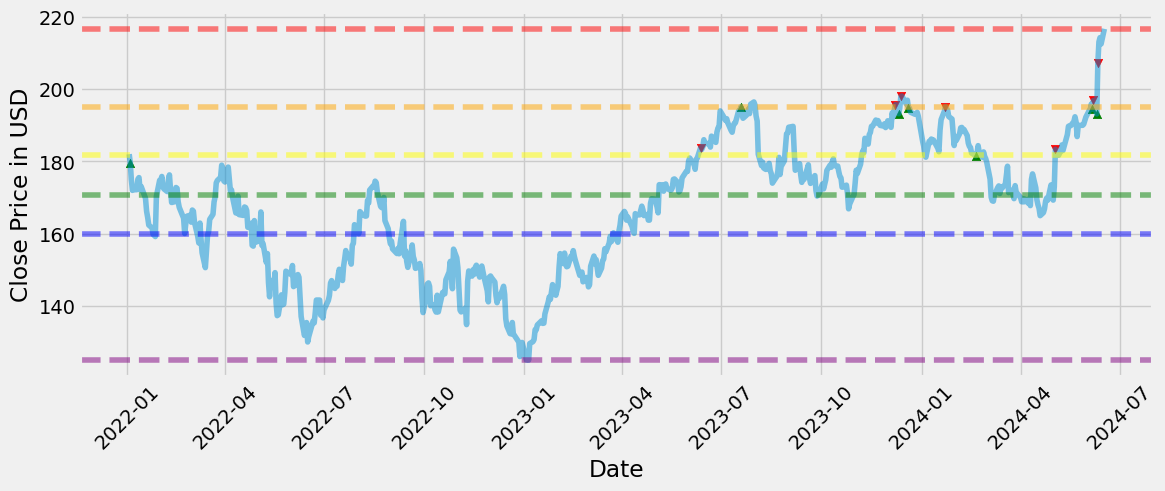

In [17]:

#Plot the Fibonacci Levels along with the close price and with the Buy and Sell signals
new_df = df

#plot the Fibonacci Levels
plt.figure(figsize=(12.33, 4.5))
plt.plot(new_df.index, new_df['Close'], alpha=0.5)
plt.scatter(new_df.index, new_df['Buy_Signal_Price'], color='green', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell_Signal_Price'], color='red', marker='v', alpha=1)
plt.axhline(max_price, linestyle= '--', alpha=0.5, color='red')
plt.axhline(first_level, linestyle= '--', alpha=0.5, color='orange')
plt.axhline(second_level, linestyle= '--', alpha=0.5, color='yellow')
plt.axhline(third_level, linestyle= '--', alpha=0.5, color='green')
plt.axhline(fourth_level, linestyle= '--', alpha=0.5, color='blue')
plt.axhline(min_price, linestyle= '--', alpha=0.5, color='purple')
plt.ylabel('Close Price in USD')
plt.xlabel('Date')
plt.xticks(rotation=45) 
plt.show